    ### NBN VS International

In [2]:
# setup
# https://github.com/teamookla/ookla-open-data/blob/master/tutorials/aggregate_by_county_py.ipynb
# Speedtest Jupyter Notebook - demonstration code
# Pandas cheatsheet - https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
# https://colab.research.google.com/drivespeedtest/.../geopandas.ipynb
%matplotlib inline
# !pip install geopandas
# !pip install shapely
# !pip install rtree
# !apt-get install -y libspatialindex-dev
from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
# from adjustText import adjust_text - this library not loaded

In [3]:
# Load data
au2_tiles = gp.read_file("speedtest-AUS-Q220.geojson")
#au3_tiles = gp.read_file("speedtest-AUS-Q320.geojson")
#au4_tiles = gp.read_file("speedtest-AUS-Q420.geojson")
au1_tiles = gp.read_file("speedtest-AUS-Q121.geojson")



#BKK_tiles = gp.read_file("speedtest-BKK-Q320.geojson")
#SHG_tiles = gp.read_file("speedtest-SHG-Q320.geojson")
#MEL_tiles = gp.read_file("speedtest-MEL-Q320.geojson")
#LAX_tiles = gp.read_file("speedtest-LAX-Q320.geojson")
# load time - less than ten seconds (29,000 lines)
# load time AUS - about 15-20 secs (89,000 lines)
#Process City1

In [84]:
MEL_tiles = gp.read_file("speedtest-MEL-Q320.geojson")

#SYD_tiles = au3_tiles.cx[ 150:152 ,	-35:-33]



In [85]:
# SHOW Summary of data
# mean, count
#len(BKK_tiles)
len(MEL_tiles)
#len(MEL_tiles)
#len(LAX_tiles)
#bkk_tiles.sum()
#bkk_tiles.describe()

#Process City2

16178

/Users/richardferrers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


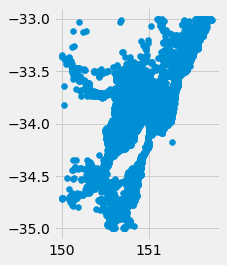

In [56]:
SYD_tiles.centroid.plot()

In [5]:
name ="BKK"
au1_tiles['avg_d_mbps'] = au1_tiles['avg_d_kbps'] / 1000
au1_tiles['avg_u_mbps'] = au1_tiles['avg_u_kbps'] / 1000

#Process City3, Aus Q2, Q3,Q4

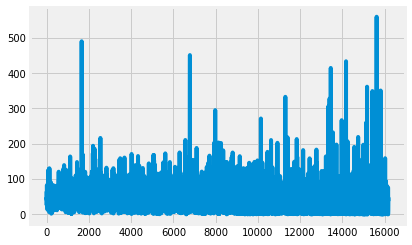

In [102]:
# Show map of data
# plot centroid
MEL_tiles.avg_d_mbps.plot()
#simple plot of b

# ERRATA - mbps plot showing ordered table by mbps (12.2.21)
# while kbps not ordered. Table seems to have been sorted incompletely.
# Not currently an issue as plotting one field of the whole table.

In [8]:
len(au2_tiles)

# check new fields in place

88654

In [113]:
bkk_tiles.sort_values("avg_d_kbps").head(25)
# need to resort so indices also resort

NameError: name 'bkk_tiles' is not defined

## Histogram for BKK

In [6]:
from datascience import *
# pip install datascience

In [9]:
# HIDDEN

import matplotlib
matplotlib.use('Agg')
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [11]:
# http://data8.org/datascience/tutorial.html#visualizing-data
normal_data = Table().with_columns([
    'data1', np.random.normal(loc = 1, scale = 2, size = 200),
    'data2', np.random.normal(loc = 4, scale = 3, size = 200)])
normal_data
# might need to pad BKK, LAX, since different number of observations and need to match to do comparative histogram.

data1,data2
3.28145,2.4714
2.26251,6.3421
1.96711,-2.09523
3.28046,5.3741
2.83743,0.147815
2.426,3.91037
2.52034,-0.585122
1.2289,7.05005
-0.378846,4.37035
3.75794,0.615135


### Compare AUS Q2, Q4

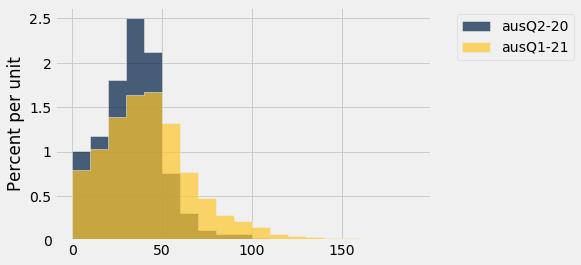

In [11]:
records = 79000

AUS_hist = Table().with_columns([
    'ausQ2-20', au2_tiles[:records].avg_d_mbps.to_numpy(),
#    'ausQ3', aus3_tiles[:records].avg_d_mbps.to_numpy(),
#    'tests', aus_tiles[:records].tests.to_numpy(),
    'ausQ1-21', au1_tiles[:records].avg_d_mbps.to_numpy(),
#    'tests4', aus4_tiles[:records].tests.to_numpy()
    # can't weight two bin columns for overlapping Hist - can do one at a time, or unweighted together
])
AUS_hist.hist( bins=np.arange(0,200,10))
# bin_column='aus',
# bins=np.arange(0,200,5) - ie 5Mbps increments
# bins=[0,100,250,500,1000])
# add bins = [array of lower limits eg 0,100,250,500,1000]
# Q2 - 88654 records - about 550 over 107Mbps, 660 over 101Mbps
# Q3 - 83782 records
# Q4 - 76586 records - about 1500 over 108Mbps, 2000 over 101Mbps
# Code from http://data8.org/datascience/tutorial.html#visualizing-data

# NB: If limit records to len(Q4) then excludes top speeds ot Q2 ie everything > 50Mbps.
# ERRATA - if tables are sorted, then histogram will be incomplete, 
# since not all records used (To enable fields with different lengths to be compared).


### Compare Melb vs Syd Q3

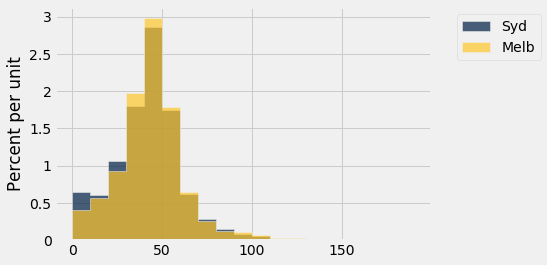

In [65]:
records = 12000

AUS_hist = Table().with_columns([
    'Syd', SYD_tiles[:records].avg_d_mbps.to_numpy(),
#    'ausQ3', aus3_tiles[:records].avg_d_mbps.to_numpy(),
#    'tests', aus_tiles[:records].tests.to_numpy(),
    'Melb', MEL_tiles[:records].avg_d_mbps.to_numpy(),
#    'tests4', aus4_tiles[:records].tests.to_numpy()
    # can't weight two bin columns for overlapping Hist - can do one at a time, or unweighted together
])
AUS_hist.hist( bins=np.arange(0,200,10))
# AUS_hist.hist( bins=np.arange(0,200,10), log= True)
# bin_column='aus',
# bins=np.arange(0,200,5) - ie 5Mbps increments
# bins=[0,100,250,500,1000])
# add bins = [array of lower limits eg 0,100,250,500,1000]
# Q2 - 88654 records - about 550 over 107Mbps, 660 over 101Mbps
# Q3 - 83782 records
# Q4 - 76586 records - about 1500 over 108Mbps, 2000 over 101Mbps
# Melb - 16,178 records
# Syd - 12,738 records
# Code from http://data8.org/datascience/tutorial.html#visualizing-data

# NB: If limit records to len(Q4) then excludes top speeds ot Q2 ie everything > 50Mbps.

In [ ]:
### Compare Sydney and Melboure - Q3 2020 - virtually indistinguishable

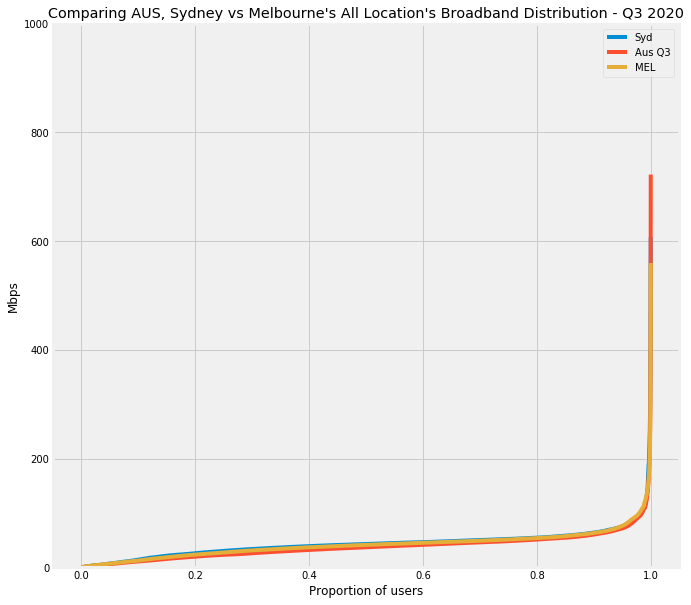

In [116]:
#SYD = SYD_tiles.tail(1000).avg_d_mbps.to_numpy()
SYD = SYD_tiles.avg_d_mbps.to_numpy()

SYD.sort()

#MEL = MEL_tiles.tail(1000).avg_d_mbps.to_numpy()
MEL = MEL_tiles.avg_d_mbps.to_numpy()

MEL.sort()

AUS3 = au3_tiles.avg_d_mbps.to_numpy()

AUS3.sort()


# Top 2000 locations - virtually indistinguishable

fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(2, 1, 1)
x1 = np.linspace(0,1,len(SYD))
x2 = np.linspace(0,1,len(AUS3))
#x3 = np.linspace(0,1,len(AUS4))
x4 = np.linspace(0,1,len(MEL))


#ax.set_yscale('log')
plt.plot (x1, SYD, label="Syd")
plt.plot (x2, AUS3,label="Aus Q3")
#plt.plot (x3, AUS4, label="Q4")
plt.plot (x4, MEL, label="MEL")
plt.title("Comparing AUS, Sydney vs Melbourne's All Location's Broadband Distribution - Q3 2020")
#plt.title("Speedtest Open Data")


plt.xlabel("Proportion of users")
plt.ylabel("Mbps")
plt.legend(loc="upper right")
plt.ylim(0,1000)

plt.show()

# can plot multiple lines over same scale, with scaled x axis. ie BKK, MEL, LAX, SHG - PICKUP
# plot of log scale
# aus_tiles - about 550 records over 107Mbps

# plot multuple lines - https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-simplest-manner-possible

### Top 2000 locations - Q2, Q3, Q4 plus Melb

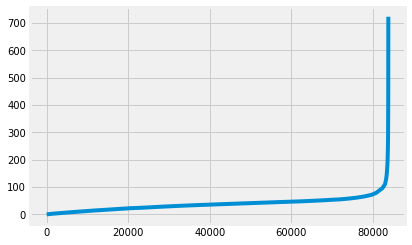

In [118]:
au3_tiles.avg_d_mbps.plot()

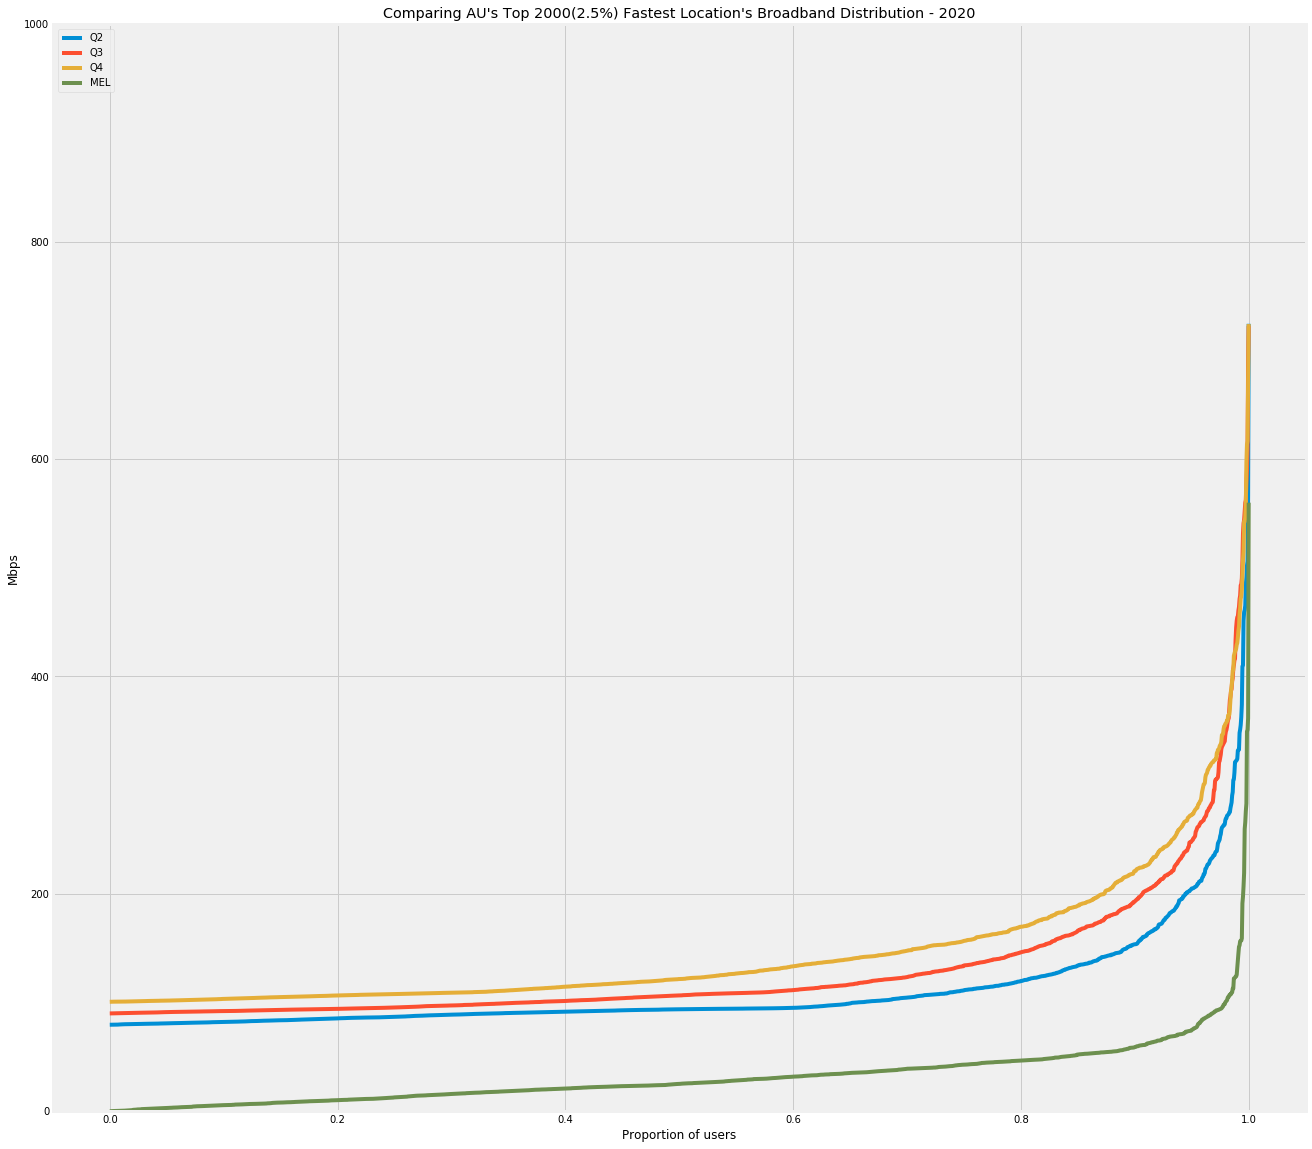

In [103]:
#ERRATA - running this cell seems to resort the MEL_tiles table, breaking the link
# between [kbps] and [mbps] fields.

AUS2 = au2_tiles.tail(2000).avg_d_mbps.to_numpy()
AUS2.sort()
AUS3 = au3_tiles.tail(2000).avg_d_mbps.to_numpy()
AUS3.sort()
AUS4 = au4_tiles.tail(2000).avg_d_mbps.to_numpy()
AUS4.sort()
MEL = MEL_tiles.tail(2000).avg_d_mbps.to_numpy()
MEL.sort()
fig = plt.figure(figsize=(20,20))
#ax = fig.add_subplot(2, 1, 1)
x1 = np.linspace(0,1,len(AUS2))
x2 = np.linspace(0,1,len(AUS3))
x3 = np.linspace(0,1,len(AUS4))
x4 = np.linspace(0,1,len(MEL))


#ax.set_yscale('log')
plt.plot (x1, AUS2, label="Q2")
plt.plot (x2, AUS3,label="Q3")
plt.plot (x3, AUS4, label="Q4")
plt.plot (x4, MEL, label="MEL")
plt.title("Comparing AU's Top 2000(2.5%) Fastest Location's Broadband Distribution - 2020")
#plt.title("Speedtest Open Data")


plt.xlabel("Proportion of users")
plt.ylabel("Mbps")
plt.legend(loc="upper left")
plt.ylim(0,1000)

plt.show()

# can plot multiple lines over same scale, with scaled x axis. ie BKK, MEL, LAX, SHG - PICKUP
# plot of log scale
# aus_tiles - about 550 records over 107Mbps

# plot multuple lines - https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-simplest-manner-possible

### AUS 2020 - Q2, Q3, Q4, MEL - All locations - difference imperceptible

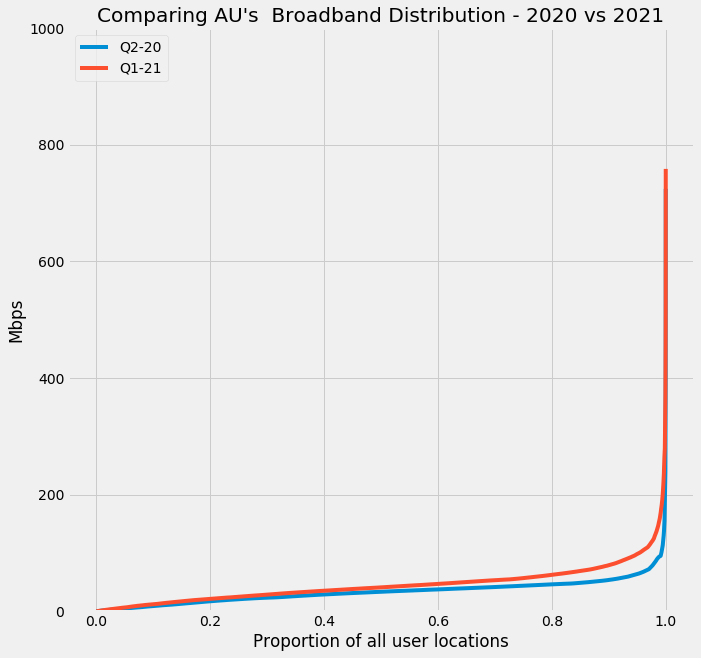

In [13]:
AUS2 = au2_tiles.avg_d_mbps.to_numpy()
AUS2.sort()
#AUS3 = au3_tiles.avg_d_mbps.to_numpy()
#AUS3.sort()
#AUS4 = au4_tiles.avg_d_mbps.to_numpy()
#AUS4.sort()
AUS1 = au1_tiles.avg_d_mbps.to_numpy()
AUS1.sort()
#MEL = MEL_tiles.avg_d_mbps.to_numpy()
#MEL.sort()
fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(2, 1, 1)
x1 = np.linspace(0,1,len(AUS2))
#x2 = np.linspace(0,1,len(AUS3))
#x3 = np.linspace(0,1,len(AUS4))
x5 = np.linspace(0,1,len(AUS1))
#x4 = np.linspace(0,1,len(MEL))


#ax.set_yscale('log')
plt.plot (x1, AUS2, label="Q2-20")
#plt.plot (x2, AUS3,label="Q3")
#plt.plot (x3, AUS4, label="Q4")
#plt.plot (x4, MEL, label="MEL")
plt.plot (x5, AUS1, label="Q1-21")

plt.title("Comparing AU's  Broadband Distribution - 2020 vs 2021")
#plt.title("Speedtest Open Data")


plt.xlabel("Proportion of all user locations")
plt.ylabel("Mbps")
plt.legend(loc="upper left")
plt.ylim(0,1000)

plt.show()

# can plot multiple lines over same scale, with scaled x axis. ie BKK, MEL, LAX, SHG - PICKUP
# plot of log scale
# aus_tiles - about 550 records over 107Mbps

# plot multiple lines - https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-simplest-manner-possible

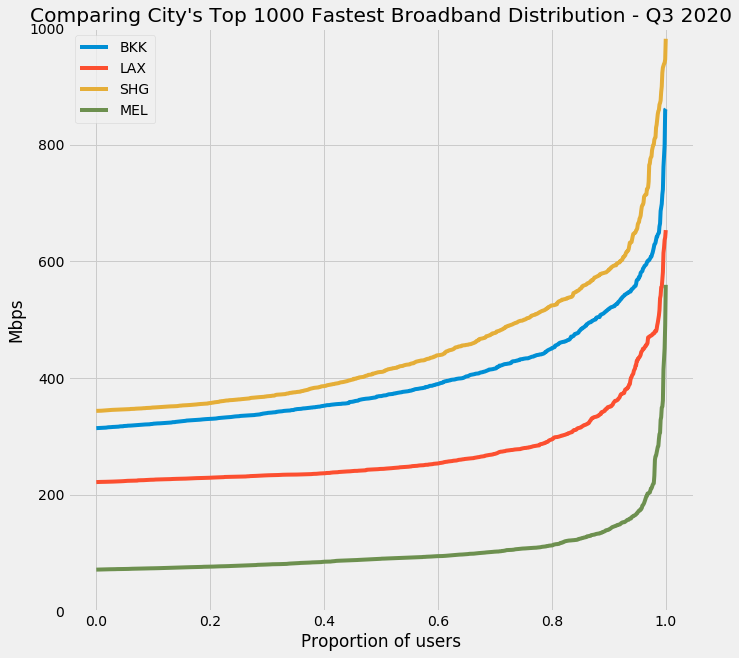

In [87]:
BKK = BKK_tiles.tail(1000).avg_d_mbps.to_numpy()
BKK.sort()
LAX = LAX_tiles.tail(1000).avg_d_mbps.to_numpy()
LAX.sort()
SHG = SHG_tiles.tail(1000).avg_d_mbps.to_numpy()
SHG.sort()
MEL = MEL_tiles.tail(1000).avg_d_mbps.to_numpy()
MEL.sort()
fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(2, 1, 1)
x1 = np.linspace(0,1,len(BKK))
x2 = np.linspace(0,1,len(LAX))
x3 = np.linspace(0,1,len(SHG))
x4 = np.linspace(0,1,len(MEL))


#ax.set_yscale('log')
plt.plot (x1, BKK, label="BKK")
plt.plot (x2, LAX,label="LAX")
plt.plot (x3, SHG, label="SHG")
plt.plot (x4, MEL, label="MEL")
plt.title("Comparing City's Top 1000 Fastest Broadband Distribution - Q3 2020")
#plt.title("Speedtest Open Data")


plt.xlabel("Proportion of users")
plt.ylabel("Mbps")
plt.legend(loc="best")
plt.ylim(0,1000)

plt.show()

# can plot multiple lines over same scale, with scaled x axis. ie BKK, MEL, LAX, SHG - PICKUP
# plot of log scale
# aus_tiles - about 550 records over 107Mbps

# plot multuple lines - https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-simplest-manner-possible

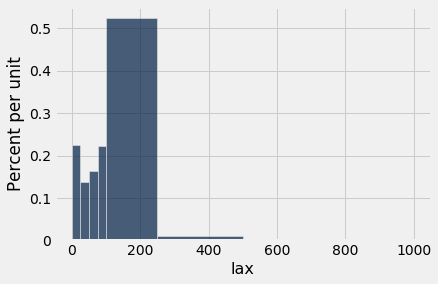

In [69]:
LAX_hist = Table().with_columns([
    'lax', lax_tiles.avg_d_mbps.to_numpy()
])
LAX_hist.hist(bins=[0,25,50,75,100,250,500,1000])
# add bins = [array of lower limits eg 0,100,250,500,1000]
# eg bins=[0,100,250,500,1000]

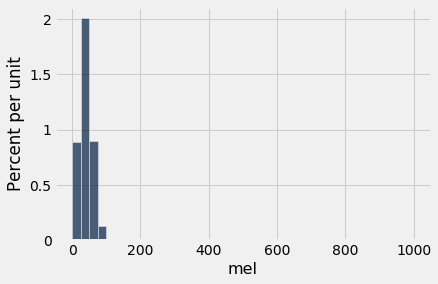

In [68]:
MEL_hist = Table().with_columns([
    'mel', mel_tiles.avg_d_mbps.to_numpy()
])
MEL_hist.hist(bins=[0,25,50,75,100,250,500,1000])
# add bins = [array of lower limits eg 0,100,250,500,1000]
# eg bins=[0,100,250,500,1000]

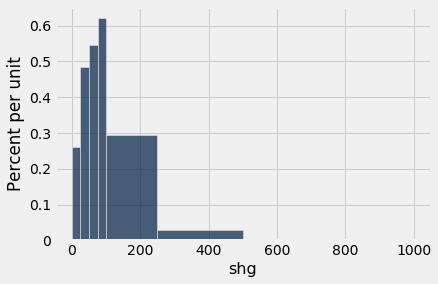

In [67]:
SHG_hist = Table().with_columns([
    'shg', shg_tiles.avg_d_mbps.to_numpy()
])
SHG_hist.hist(bins=[0,25,50,75,100,250,500,1000])
# add bins = [array of lower limits eg 0,100,250,500,1000]
# eg bins=[0,100,250,500,1000]

# Process City 4

### Combine Histograms

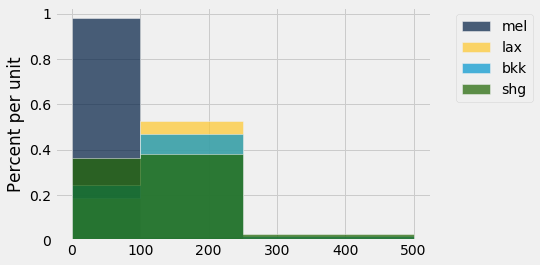

In [53]:
records = 15890 # if exceeds count of city records, then will fail as table will be incomplete
# ie max recrods to show all four cities = min(city) = 15892

city_hist = Table().with_columns([
    'mel', MEL_tiles[:records].avg_d_mbps.to_numpy(),
    'lax', LAX_tiles[:records].avg_d_mbps.to_numpy(),
    'bkk', BKK_tiles[:records].avg_d_mbps.to_numpy(),
    'shg', SHG_tiles[:records].avg_d_mbps.to_numpy()
])
city_hist.hist(bins=[0,100, 250, 500])
# error since the arrays are different sizes
# Count of Records
#- LAX 15892
#- MEL 16178
#- BKK 29292
#- SHG 31741

In [25]:
aus2_tiles.tail(250)
# noted as now sorted by avg_d_mbps

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,avg_d_mbps,avg_u_mbps
88404,3112301321023011,21546,15063,3,1,1,"POLYGON ((150.88074 -33.83392, 150.88623 -33.8...",142.823,15.063
88405,3112301301333011,13289,924,19,1,1,"POLYGON ((151.14441 -33.39476, 151.14990 -33.3...",142.942,0.924
88406,3112130302202202,93522,35424,14,1,1,"POLYGON ((153.28125 -28.83024, 153.28674 -28.8...",143.007,35.424
88407,3112130011001212,40341,14984,6,1,1,"POLYGON ((152.98462 -27.08358, 152.99011 -27.0...",143.278,14.984
88408,3112203012210313,121796,23417,8,3,1,"POLYGON ((138.64197 -34.76418, 138.64746 -34.7...",143.410,23.417
...,...,...,...,...,...,...,...,...,...
88649,3112112211201320,23706,4675,21,1,1,"POLYGON ((152.99561 -25.98767, 153.00110 -25.9...",490.861,4.675
88650,3112231010302110,25991,8542,14,1,1,"POLYGON ((144.34937 -36.77409, 144.35486 -36.7...",501.795,8.542
88651,3112302000203331,25832,3260,47,1,1,"POLYGON ((146.33240 -34.51561, 146.33789 -34.5...",505.843,3.260
88652,3103112301313131,9412,10959,20,1,1,"POLYGON ((131.47888 -26.00742, 131.48438 -26.0...",565.112,10.959


In [50]:
aus3_tiles

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,avg_d_mbps,avg_u_mbps
0,3112231300310112,45620,17028,10,146,32,"POLYGON ((145.14038 -37.86184, 145.14587 -37.8...",45.620,17.028
1,3112203030022101,28214,9913,17,7,6,"POLYGON ((138.54309 -34.99400, 138.54858 -34.9...",28.214,9.913
2,3112301322203013,8584,1699,120,115,4,"POLYGON ((150.52917 -34.20272, 150.53467 -34.2...",8.584,1.699
3,3112301330200121,66070,35640,11,467,149,"POLYGON ((151.19934 -33.87954, 151.20483 -33.8...",66.070,35.640
4,3112301303332011,44056,17901,11,234,58,"POLYGON ((151.10046 -33.68778, 151.10596 -33.6...",44.056,17.901
...,...,...,...,...,...,...,...,...,...
83777,3112320210031222,14658,1923,171,1,1,"POLYGON ((147.08496 -37.81846, 147.09045 -37.8...",14.658,1.923
83778,3112203010103000,14049,4157,22,1,1,"POLYGON ((138.73535 -34.34344, 138.74084 -34.3...",14.049,4.157
83779,3112132230133301,16250,6340,25,1,1,"POLYGON ((152.91321 -31.48489, 152.91870 -31.4...",16.250,6.340
83780,3112301303110202,22966,4743,724,2,1,"POLYGON ((151.08398 -33.45436, 151.08948 -33.4...",22.966,4.743


In [11]:
print(pd.__version__)


1.2.1


In [23]:
np.arange(0,200,5)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195])

In [32]:
aus_tiles.tests.to_numpy()

array([352,  12,  63, ...,   1,   1,   1])

In [31]:
aus4_tiles.tests.sum()

1509176

In [21]:
AUS_hist.sort().plot()

TypeError: sort() missing 1 required positional argument: 'column_or_label'

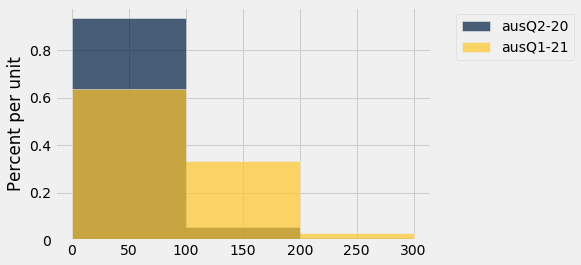

In [14]:
records = 79000

AUS_hist = Table().with_columns([
    'ausQ2-20', au2_tiles.tail(10000).avg_d_mbps.to_numpy(),
#    'ausQ3', aus3_tiles[:records].avg_d_mbps.to_numpy(),
#    'tests', aus_tiles[:records].tests.to_numpy(),
    'ausQ1-21', au1_tiles.tail(10000).avg_d_mbps.to_numpy(),
#    'tests4', aus4_tiles[:records].tests.to_numpy()
    # can't weight two bin columns for overlapping Hist - can do one at a time, or unweighted together
])
AUS_hist.hist( bins=np.arange(0,400,100))
# Top 10,000 Records by speed
# Q1 about 37% > 100Mbps - 400 records/locations over 200Mbps
# Q4 about 20% > 100Mbps - 2000 records, 250 records/locations over 200Mbps
# Q2 about 7% > 100Mbps - 660 records


# Fastest 10,000 locations

In [25]:
au1_tiles.tail(3700).describe()
# min Tail(x) = 100 ie count of records over 100Mbps

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,avg_d_mbps,avg_u_mbps
count,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000
mean,32804.598108,10267.491892,69.435946,1.454054,1.087838,143.142720,10.267492
std,34493.981992,14617.134182,159.398285,1.118208,0.333111,60.610475,14.617134
min,1.000000,1.000000,1.000000,1.000000,1.000000,100.015000,0.001000
25%,13355.500000,2777.250000,12.000000,1.000000,1.000000,107.657000,2.777250
50%,25410.500000,5518.500000,26.000000,1.000000,1.000000,120.735500,5.518500
75%,45476.750000,15671.750000,39.000000,2.000000,1.000000,153.573500,15.671750
max,666092.000000,300387.000000,1518.000000,33.000000,6.000000,758.559000,300.387000
